In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pump-sensor-data/sensor.csv


In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing

In [3]:
df = pd.read_csv('../input/pump-sensor-data/sensor.csv')

In [4]:
#df.info()

In [5]:
df.isnull()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
220316,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
220317,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
220318,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [6]:
columns = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03']

array([[<AxesSubplot:xlabel='sensor_00', ylabel='sensor_00'>,
        <AxesSubplot:xlabel='sensor_01', ylabel='sensor_00'>,
        <AxesSubplot:xlabel='sensor_02', ylabel='sensor_00'>,
        <AxesSubplot:xlabel='sensor_03', ylabel='sensor_00'>],
       [<AxesSubplot:xlabel='sensor_00', ylabel='sensor_01'>,
        <AxesSubplot:xlabel='sensor_01', ylabel='sensor_01'>,
        <AxesSubplot:xlabel='sensor_02', ylabel='sensor_01'>,
        <AxesSubplot:xlabel='sensor_03', ylabel='sensor_01'>],
       [<AxesSubplot:xlabel='sensor_00', ylabel='sensor_02'>,
        <AxesSubplot:xlabel='sensor_01', ylabel='sensor_02'>,
        <AxesSubplot:xlabel='sensor_02', ylabel='sensor_02'>,
        <AxesSubplot:xlabel='sensor_03', ylabel='sensor_02'>],
       [<AxesSubplot:xlabel='sensor_00', ylabel='sensor_03'>,
        <AxesSubplot:xlabel='sensor_01', ylabel='sensor_03'>,
        <AxesSubplot:xlabel='sensor_02', ylabel='sensor_03'>,
        <AxesSubplot:xlabel='sensor_03', ylabel='sensor_03'>]],
   

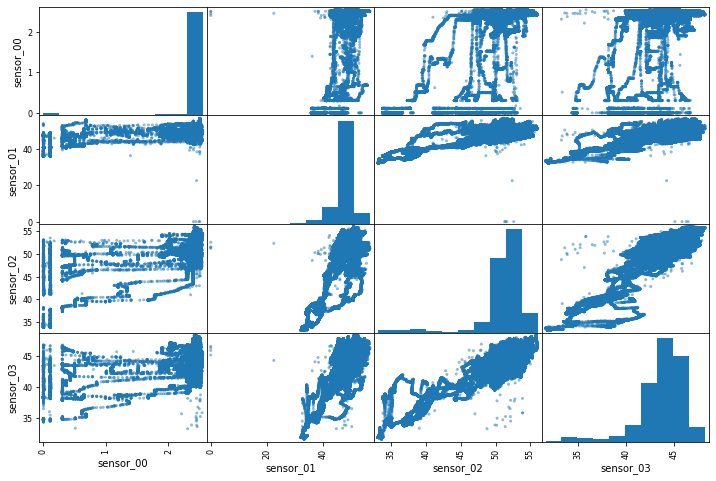

In [7]:
scatter_matrix(df[columns], figsize = (12, 8))

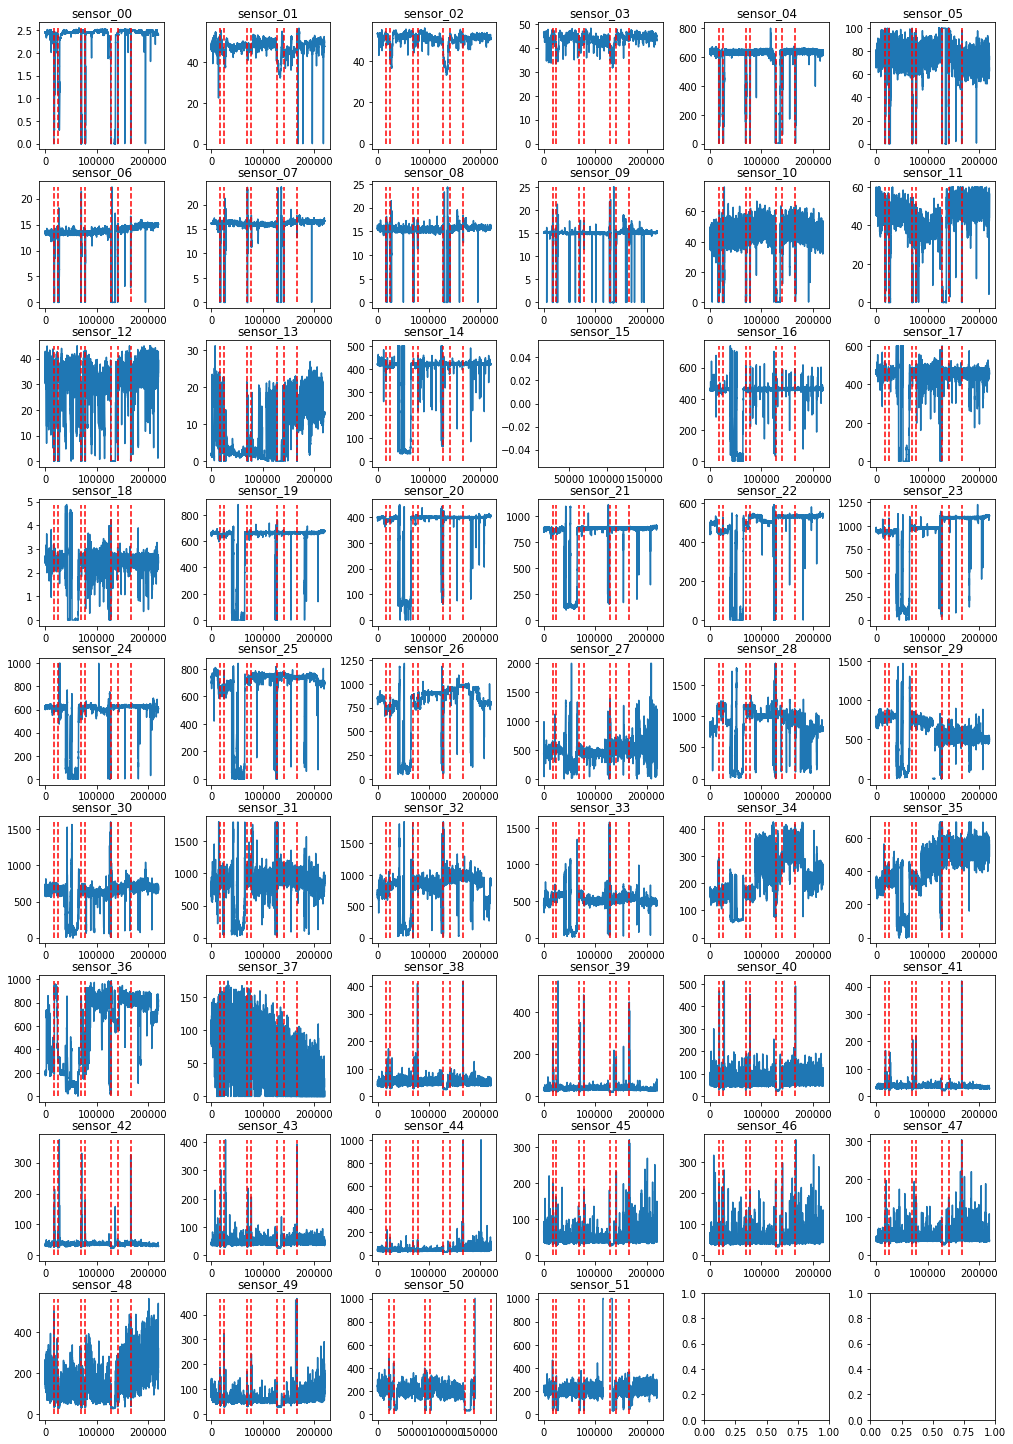

In [8]:
# General overview over all sensors throughout the measurement. 
# red dotted lines represent machine failure

ymin = 0
i = 0
fig, axs = plt.subplots(9, 6, figsize = (14,20))
fig.tight_layout()

for x0 in list(range(0, 9, 1)):
    #print('x0', x0)
    for y0 in list(range(0, 6, 1)):
        #print('x0 and y0', x0,  y0)
        if i < 10:
            sensor_number = 'sensor_0{}'.format(i)
            ymax = df[sensor_number].max()
        elif i > 51:
            break
        else:
            sensor_number = 'sensor_{}'.format(i)
        ymax = df[sensor_number].max()
        axs[x0, y0].plot(df[sensor_number])
        axs[x0, y0].set_title(sensor_number)
        axs[x0, y0].vlines(x = df[df['machine_status'] == 'BROKEN'].index, ymin = ymin, ymax = ymax, color='red', linestyle='--')
        i = i + 1

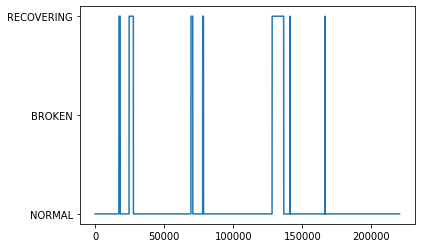

In [9]:
# re
plt.plot(df['machine_status'])

In [10]:

le = preprocessing.LabelEncoder()
df['machine_status'] = le.fit_transform(df['machine_status'])
df

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,1
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,1
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,1
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,1
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,1
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,1
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,1
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,1


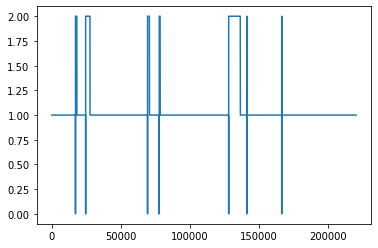

In [11]:
plt.plot(df['machine_status'])

In [12]:
df['shift_10_min_sensor_00'] = df['sensor_00'].shift(10) # shifts the target column the x-times towards lower positions.